# test convolution 2D 


In [2]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd
from convolution import *

In [3]:
# Load data
data = pkl.load(open("../data/usps.pkl", "rb"))
X_train = np.array(data["X_train"], dtype=float)
X_test = np.array(data["X_test"], dtype=float)
n = X_train.shape[0]
X_train = X_train.reshape(n, 16, 16, 1)/2
n = X_test.shape[0]
X_test = X_test.reshape(n, 16, 16, 1)/2
Y_train = data["Y_train"]
Y_test = data["Y_test"]

def one_hot(y):
    y_one_hot = np.zeros((y.shape[0], 10))
    y_one_hot[np.arange(y.shape[0]), y] = 1
    return y_one_hot

Y_train = one_hot(Y_train)
Y_test = one_hot(Y_test)

In [4]:
net = Sequential(
    [Conv2D(3,1, 32),
    MaxPool2D(2, 2),
    Flatten(),
    Linear(1568, 120),
    ReLU(),
    Linear(120, 84),
    ReLU(),
    Linear(84, 10)]
)

loss = CrossEntropyLoss()


Lerror, Lscore= SGD(net, loss, X_train, Y_train, predict= lambda x : np.argmax(net.forward(x),axis = 1), xtest = X_test, ytest = np.argmax(Y_test,axis =1), batch_size=5, max_iter=50, eps =0.001)


Epoch: 0 / 50
Loss  0.817
score  0.376
Epoch: 1 / 50
Loss  0.727
score  0.576
Epoch: 2 / 50
Loss  0.649
score  0.691
Epoch: 3 / 50
Loss  0.585
score  0.766
Epoch: 4 / 50
Loss  0.527
score  0.805
Epoch: 5 / 50
Loss  0.482
score  0.83
Epoch: 6 / 50
Loss  0.441
score  0.847
Epoch: 7 / 50
Loss  0.407
score  0.862
Epoch: 8 / 50
Loss  0.383
score  0.87
Epoch: 9 / 50
Loss  0.363
score  0.876
Epoch: 10 / 50
Loss  0.344
score  0.879
Epoch: 11 / 50
Loss  0.33
score  0.887
Epoch: 12 / 50
Loss  0.319
score  0.891
Epoch: 13 / 50
Loss  0.306
score  0.895
Epoch: 14 / 50
Loss  0.295
score  0.896
Epoch: 15 / 50
Loss  0.284
score  0.898
Epoch: 16 / 50
Loss  0.275
score  0.903
Epoch: 17 / 50
Loss  0.268
score  0.906
Epoch: 18 / 50
Loss  0.254
score  0.909
Epoch: 19 / 50
Loss  0.251
score  0.911
Epoch: 20 / 50
Loss  0.242
score  0.912
Epoch: 21 / 50
Loss  0.235
score  0.914
Epoch: 22 / 50
Loss  0.232
score  0.916
Epoch: 23 / 50
Loss  0.221
score  0.919
Epoch: 24 / 50
Loss  0.218
score  0.921
Epoch: 25 / 5

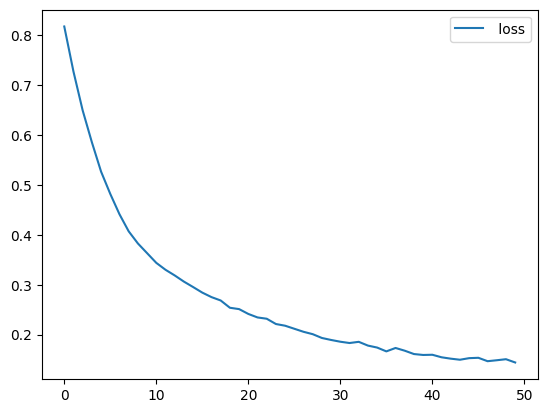

In [5]:
plt.plot(Lerror,label =' loss')
plt.legend()
plt.show()



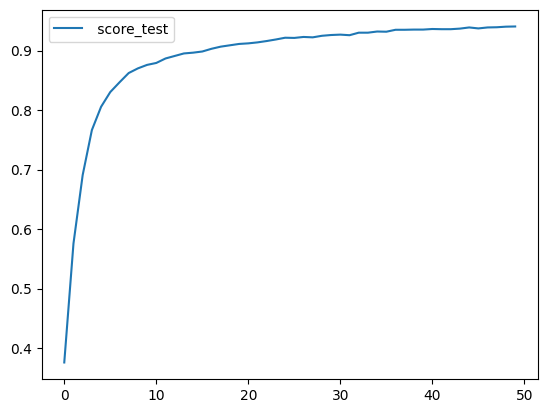

In [6]:
plt.plot(Lscore,label =' score_test')
plt.legend()
plt.show()

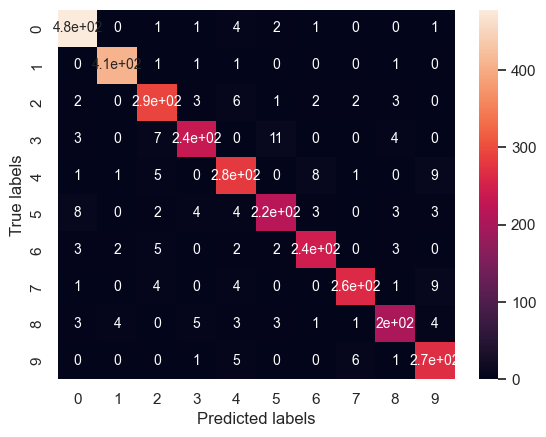

In [9]:
plot_confusion_matrix(net, X_test, np.argmax(Y_test,axis =1))

# test with other data

In [ ]:
X_train = pd.read_csv("../data/fashion-mnist_train.csv")
X_test = pd.read_csv("../data/fashion-mnist_test.csv")
X_train = X_train.values
X_test = X_test.values
# normalize data 
Y_train = X_train[:,0]
Y_test = X_test[:,0]
X_train = X_train[:,1:] / 256
X_test = X_test[:,1:] / 256

# reshape data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)